<center>
<img src="img/colorido-horizontal-ufc.png" alt="Drawing" style="width: 500px;"/>
</center>

# Tópicos em Física Estatística Computacional

## Aula 01: Mapa Logístico 

Prof. Saulo Reis (Depto. de Física - UFC)

## Mapa unidimencional simples

In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
class IterateMapApp:
    def __init__(self, r=0.2, x=0.6, iterations=70):
        self.r = r  # Valor inicial de r
        self.x = x  # Valor inicial de x
        self.iterations = iterations  # Número de iterações

    # Getters e setters para r, x e iterations
    def set_r(self, r):
        self.r = r

    def get_r(self):
        return self.r

    def set_x(self, x):
        self.x = x

    def get_x(self):
        return self.x

    def set_iterations(self, iterations):
        self.iterations = iterations

    def get_iterations(self):
        return self.iterations

    def calculate(self):
        x_values = []
        iteration_values = []

        x = self.x
        for i in range(self.iterations + 1):
            x_values.append(x)
            iteration_values.append(i)
            x = self.map(self.r, x)

        self.plot_results(iteration_values, x_values)

    def map(self, r, x):
        return 4 * r * x * (1 - x)  # Iteração do mapa logístico

    def plot_results(self, iteration_values, x_values):
        plt.figure(figsize=(10, 6))
        plt.plot(iteration_values, x_values, marker='o', linestyle='-', markersize=4)
        plt.xlabel('Iterações')
        plt.ylabel('x')
        plt.title(f'Trajetória para r = {self.r}, x0 = {self.x}')
        plt.grid(True)
        plt.show()


Novo valor de r: 0.2
Novo valor de x: 0.6


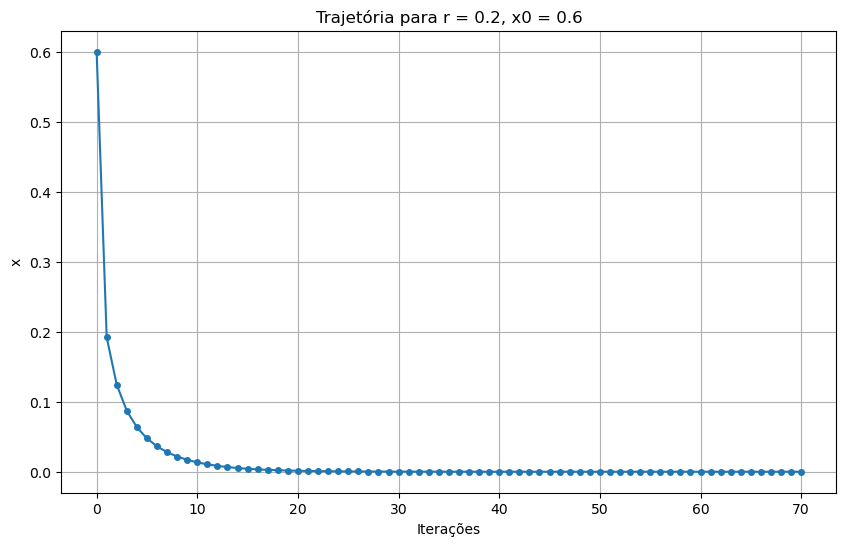

In [7]:
app = IterateMapApp()

# Alterar valores de r e x
app.set_r(0.2)  # Define um novo valor de r
app.set_x(0.6)  # Define um novo valor de x

print(f"Novo valor de r: {app.get_r()}")
print(f"Novo valor de x: {app.get_x()}")

app.calculate()  # Calcula e plota os resultados com os novos valores de r e x

Novo valor de r: 0.95
Novo valor de x: 0.1


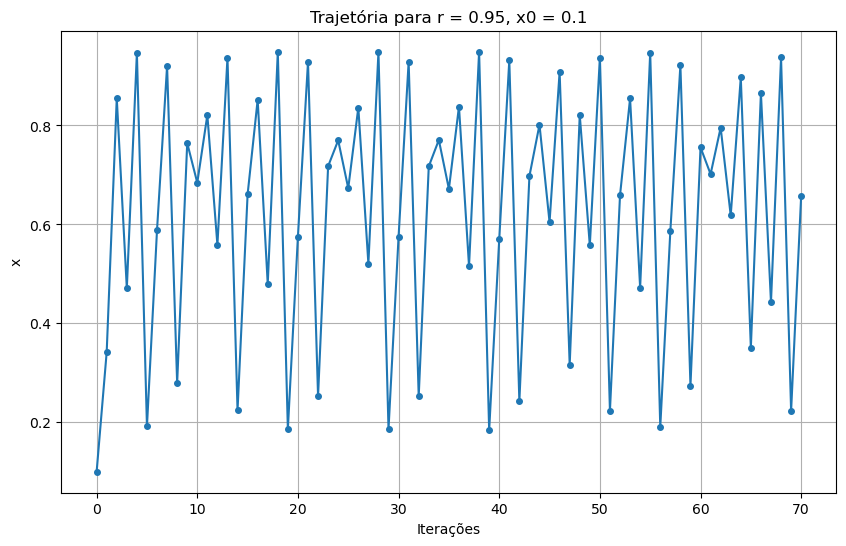

In [13]:
app = IterateMapApp()

# Alterar valores de r e x
app.set_r(0.95)  # Define um novo valor de r
app.set_x(0.1)  # Define um novo valor de x

print(f"Novo valor de r: {app.get_r()}")
print(f"Novo valor de x: {app.get_x()}")

app.calculate()  # Calcula e plota os resultados com os novos valores de r e x

### Problema 6.1. A trajetória do mapa logístico (Sala)

**(a)** Explore o comportamento dinâmico do mapa logístico em (6.5) com $r = 0.24$ para diferentes valores de $x_0$. Mostre numericamente que $x = 0$ é um **ponto fixo estável** para esse valor de $r$. Ou seja, os valores iterados de $x$ convergem para $x = 0$ independentemente do valor de $x_0$. Se $x$ representa a população de insetos, descreva o comportamento qualitativo da população.

**(b)** Explore o comportamento dinâmico de (6.5) para $r = 0.26, 0.5, 0.74,$ e $0.748$. Um ponto fixo é **instável** se, para quase todos os valores de $x_0$ próximos ao ponto fixo, as trajetórias se afastam dele. Verifique que $x = 0$ é um ponto fixo instável para $r > 0.25$. Mostre que, para os valores sugeridos de $r$, os valores iterados de $x$ não mudam após um comportamento transitório inicial, ou seja, o comportamento dinâmico a longo prazo é de **período 1**. No Apêndice 6A é mostrado que, para $r < 3/4$ e para $x_0$ no intervalo $0 < x_0 < 1$, as trajetórias se aproximam do **atrator estável** em $x = 1 - 1/4r$. O conjunto de pontos iniciais que iteram para o atrator é chamado de **bacia de atração**. Para o mapa logístico, o intervalo $0 < x < 1$ é a bacia de atração do atrator $x = 1 - 1/4r$.

**(c)** Explore as propriedades dinâmicas de (6.5) para $r = 0.752, 0.76, 0.8,$ e $0.862$. Para $r = 0.752$ e $0.862$, aproximadamente 1000 iterações são necessárias para obter resultados convergentes. Mostre que, se $r$ for maior que 0.75, $x$ oscila entre dois valores após um comportamento transitório inicial. Isso significa que, em vez de um ciclo estável de período 1 correspondente a um ponto fixo, o sistema possui um ciclo estável de **período 2**. O valor de $r$ no qual o ponto fixo único $x^*$ se divide ou **bifurca** em dois valores $x_1^*$ e $x_2^*$ é $r = b_1 = 3/4$. O par de valores $x_1^*$ e $x_2^*$ forma um **atrator estável de período 2**.

**(d)** Quais são os atratores estáveis de (6.5) para $r = 0.863$ e $0.88$? Qual é o período correspondente? Quais são os atratores estáveis e os períodos correspondentes para $r = 0.89, 0.891,$ e $0.892$?


In [5]:
########################################################
###
### Utiliza essa célula para realiza o exercício.
### Caso Caso necessário inclua novas células abaixo
###
########################################################



## Bifurcação do mapa logístico

In [10]:
class BifurcateApp:
    def __init__(self, initial_r=0.2, dr=0.005, ntransient=1000, nplot=50):
        self.r = initial_r  # Parâmetro de controle
        self.dr = dr  # Incremento do parâmetro r, sugerido dr <= 0.01
        self.ntransient = ntransient  # Número de iterações não plotadas
        self.nplot = nplot  # Número de iterações plotadas
        self.x = 0.5  # Valor inicial de x
        self.results = []  # Lista para armazenar os resultados

    def map(self, x, r):
        # Mapa logístico: calcula o próximo valor de x
        return 4 * r * x * (1 - x)

    def do_step(self):
        # Realiza um passo de iteração para r < 1.0
        if self.r < 1.0:
            x = self.x

            # Iterações transitórias (não plotadas)
            for i in range(self.ntransient):
                x = self.map(x, self.r)

            # Iterações plotadas (metade na primeira cor, metade na segunda)
            for i in range(self.nplot):
                x = self.map(x, self.r)
                self.results.append((self.r, x))  # Armazena os valores de r e x

            # Incrementa r para a próxima iteração
            self.r += self.dr

    def plot_results(self):
        # Cria o gráfico de bifurcação
        r_values, x_values = zip(*self.results)
        plt.figure(figsize=(10, 6))
        plt.scatter(r_values, x_values, s=1)  # Plotagem com pontos pequenos
        plt.xlabel('r')
        plt.ylabel('x')
        plt.xlim([0.7,1])
        plt.title('Diagrama de Bifurcação')
        plt.grid(True)
        plt.show()

    def reset(self):
        # Redefine os parâmetros e limpa os resultados
        self.r = 0.2
        self.dr = 0.005
        self.ntransient = 1000
        self.nplot = 50
        self.results.clear()

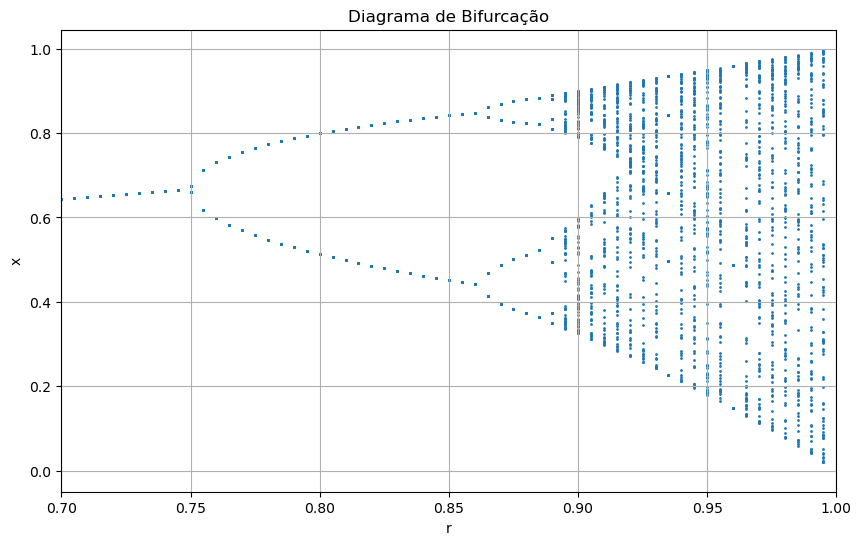

In [18]:
app = BifurcateApp(initial_r=0.2, dr=0.005, ntransient=1000, nplot=100)

# Executa a simulação até r atingir 1.0
while app.r < 1.0:
    app.do_step()

# Plota os resultados do diagrama de bifurcação
app.plot_results()


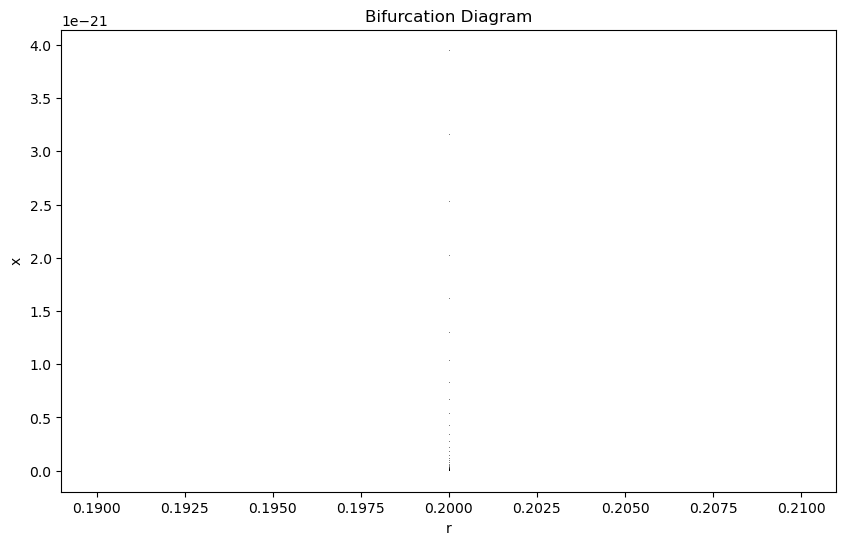

In [15]:
import matplotlib.pyplot as plt

# Control parameters
initial_r = 0.2  # Initial value of r
dr = 0.005       # Incremental change of r
ntransient = 200  # Number of iterations not plotted (transient)
nplot = 50       # Number of iterations plotted

# Bifurcation map function
def map_function(x, r):
    return 4 * r * x * (1 - x)

# Initialize plot
plt.figure(figsize=(10, 6))
plt.title("Bifurcation Diagram")
plt.xlabel("r")
plt.ylabel("x")

# Main bifurcation plotting loop
def bifurcation_plot():
    r = initial_r
    if r <= 1.0:
        x = 0.5  # Non-zero starting value of x for each new r
        
        # Iterate through transient steps to reach steady state
        for _ in range(ntransient):
            x = map_function(x, r)
        
        # Plot the stable or chaotic points after reaching steady state
        for _ in range(nplot):
            x = map_function(x, r)
            plt.plot(r, x, ',k', alpha=0.5)  # Plotting x for the current r value
        
        # Increment r for the next bifurcation step
        r += dr

# Generate the bifurcation plot
bifurcation_plot()

# Show plot
plt.show()


### Problema 6.2. Características qualitativas do mapa logístico (Sala)

**(a)** Use a classe `BifurcateApp` para identificar o comportamento de período 2, 4 e 8, como pode ser visto na Figura 6.2. Escolha `ntransient >= 1000`. Pode ser necessário "ampliar" uma parte do gráfico. Quantas duplicações de período você consegue encontrar?

**(b)** Ajuste a escala para que você possa seguir as iterações de $x$ do período 4 ao período 16. Como o gráfico se parece nessa escala em comparação com a escala original?

**(c)** Descreva a forma da trajetória próxima às bifurcações de período 2 para período 4, de 4 para 8, etc. Essas bifurcações são frequentemente chamadas de bifurcações em forma de forquilha.

In [46]:
def map_f(i, r):
    j = 0
    x = 0.9
    re = [x]
    for j in range(i):
        x = 4 * r * x * (1 - x)
        re.append(x)
        j += 1
    return re
map_f(1, 0.7)[50:]

[0.6428556115402705,
 0.6428583679040749,
 0.6428561628153951,
 0.6428579268878516,
 0.6428565156308547,
 0.6428576446370717,
 0.6428567414324947,
 0.6428574639964101,
 0.6428568859454402,
 0.6428573483863201,
 0.6428569784336827,
 0.6428572743958353,
 0.6428570376261404,
 0.6428572270419137,
 0.6428570755093063,
 0.6428571967353993,
 0.6428570997545295,
 0.6428571773392283,
 0.642857115271471,
 0.6428571649256781,
 0.6428571252023132,
 0.6428571569810057,
 0.642857131558052,
 0.6428571518964151,
 0.6428571356257248,
 0.6428571486422772,
 0.6428571382290353,
 0.6428571465596288,
 0.642857139895154,
 0.6428571452267339,
 0.64285714096147,
 0.6428571443736811,
 0.6428571416439122,
 0.6428571438277273,
 0.6428571420806752,
 0.6428571434783169,
 0.6428571423602035,
 0.6428571432546942,
 0.6428571425391016,
 0.6428571431115757,
 0.6428571426535965,
 0.6428571430199799,
 0.6428571427268732,
 0.6428571429613585,
 0.6428571427737703,
 0.6428571429238409,
 0.6428571428037844,
 0.642857142899829

## Period Doubling

In [9]:
class GraphicalSolutionApp:
    def __init__(self, r=0.7, x=0.1, iterate=1):
        self.r = r  # Parâmetro de controle
        self.x0 = x  # Valor inicial de x
        self.iterate = iterate  # Número de iterações de f(x)

    def f(self, x):
        """
        Função do mapa logístico: f(x) = 4 * r * x * (1 - x), com múltiplas iterações.
        """
        for _ in range(self.iterate):
            x = 4 * self.r * x * (1 - x)
        return x

    def plot_function_and_diagonal(self):
        """
        Plota a curva do mapa logístico f(x) e a linha diagonal y = x.
        """
        x_values = np.linspace(0, 1, 500)
        y_values = [self.f(x) for x in x_values]

        # Curva do mapa logístico
        plt.plot(x_values, y_values, label='f(x)')

        # Linha diagonal y = x
        plt.plot(x_values, x_values, linestyle='--', label='y = x')

    def draw_trajectory(self, steps=10):
        """
        Desenha a trajetória da solução gráfica do mapa logístico.
        """
        x, y = self.x0, 0

        for _ in range(steps):
            # Desenha a linha vertical até a curva f(x)
            y_next = self.f(x)
            plt.plot([x, x], [y, y_next], color='r', linewidth=0.8)

            # Desenha a linha horizontal até a diagonal y = x
            plt.plot([x, y_next], [y_next, y_next], color='r', linewidth=0.8)

            # Atualiza x e y para o próximo passo
            x, y = y_next, y_next

        # Adiciona a legenda com o último valor de x
        plt.text(0.05, 0.95, f'Último x = {x:.4f}', fontsize=12,
                 transform=plt.gca().transAxes, ha='left', va='top',
                 bbox=dict(facecolor='white', alpha=0.8))

    def start_running(self, steps=10):
        """
        Inicia a simulação gráfica, incluindo f(x), y = x e a trajetória.
        """
        plt.figure(figsize=(6, 6))
        self.plot_function_and_diagonal()  # Plota f(x) e y = x
        self.draw_trajectory(steps)  # Desenha a trajetória iterativa

        # Configuração do gráfico
        plt.xlim(0, 1)
        plt.ylim(0, 1)
        plt.xlabel('x')
        plt.ylabel('y')
        plt.title(f'Solução Gráfica para r={self.r}, x0={self.x0}, iter={self.iterate}')
        plt.grid(True)
        plt.show()


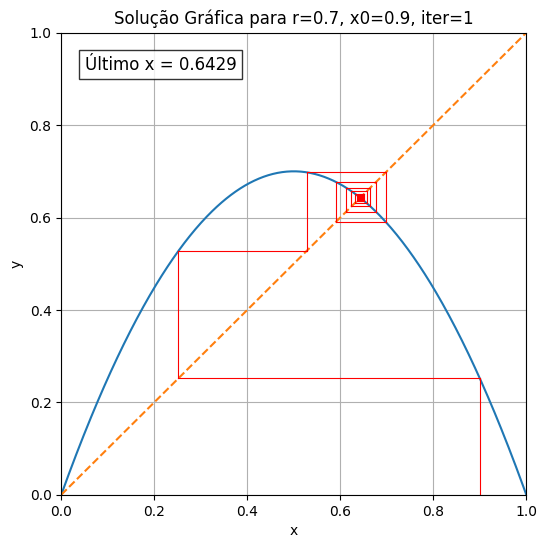

In [10]:
app = GraphicalSolutionApp(r=0.7, x=0.9, iterate=1)
app.start_running(steps=200)  # Inicia a simulação com 200 passos

### Problema 6.4. Propriedades qualitativas dos pontos fixos (sala)

**(a)** Use o `GraphicalSolutionApp` para mostrar graficamente que há um único ponto fixo estável de $f(x)$ para $r < 3/4$. Seria instrutivo modificar o programa para que o valor da inclinação $\frac{df}{dx}|_{x=x}$ seja mostrado em cada iteração. Em que valor de $r$ o valor absoluto dessa inclinação excede a unidade? Seja $b_1$ o valor de $r$ em que o ponto fixo de $f(x)$ bifurca e se torna instável. Verifique que $b_1 = 0.75$.

**(b)** Descreva a trajetória de $f(x)$ para $r = 0.785$. O ponto fixo dado por $x = 1 - 1/4r$ é estável ou instável? Qual é a natureza da trajetória se $x_0 = 1 - 1/4r$? Qual é o período de $f(x)$ para outras escolhas de $x_0$? Quais são os valores do atrator de dois pontos?

**(c)** A função $f(x)$ é simétrica em torno de $x = 1/2$, onde $f(x)$ é máxima. Quais são as características qualitativas da segunda iteração $f^{(2)}(x)$ para $r = 0.785$? A $f^{(2)}(x)$ é simétrica em relação a $x = 1/2$? Para qual valor de $x$ a $f^{(2)}(x)$ tem um mínimo? Itere $x_{n+1} = f^{(2)}(x_n)$ para $r = 0.785$ e encontre seus dois pontos fixos $x_1^*$ e $x_2^*$. (Tente $x_0 = 0.1$ e $x_0 = 0.3$). Os pontos fixos de $f^{(2)}(x)$ são estáveis ou instáveis para esse valor de $r$? Como esses valores de $x_1^*$ e $x_2^*$ se comparam com os valores do atrator de dois pontos de $f(x)$? Verifique se as inclinações de $f^{(2)}(x)$ em $x_1^*$ e $x_2^*$ são iguais.

**(d)** Verifique as seguintes propriedades dos pontos fixos de $f^{(2)}(x)$. À medida que $r$ é aumentado, os pontos fixos de $f^{(2)}(x)$ se afastam e a inclinação de $f^{(2)}(x)$ nos pontos fixos diminui. Qual é o valor de $r = s_2$ em que uma das duas inclinações de $f^{(2)}$ é igual a 1/2? Qual é o valor da outra inclinação? Qual é a inclinação de $f^{(2)}(x)$ em $x = 1/2$? O que acontece na inclinação no outro ponto fixo? À medida que $r$ é aumentado ainda mais, as inclinações dos pontos fixos se tornam negativas. Finalmente, em $r = b_2 \approx 0.8623$, as inclinações nos dois pontos fixos de $f^{(2)}(x)$ são iguais a -1, e os dois pontos fixos de $f^{(2)}$ se tornam instáveis. (O valor exato de $b_2$ é $b_2 = (1 + \sqrt{6})/4$).

**(e)** Mostre que para $r$ ligeiramente maior que $b_2$, por exemplo, $r = 0.87$, há quatro pontos fixos estáveis de $f^{(4)}(x)$. Qual é o valor de $r = s_3$ quando um dos pontos fixos se torna 1/2? Quais são os valores dos outros três pontos fixos em $r = s_3$?

**(f)** Determine o valor de $r = b_3$ no qual os quatro pontos fixos de $f^{(4)}$ se tornam instáveis.

**(g)** Escolha $r = s_3$ e determine o número de iterações necessárias para que a trajetória convirja para o comportamento de período 4. Como isso muda quando valores próximos de $r$ são considerados? Escolha vários valores de $x_0$ para que os resultados não dependam das condições iniciais.

In [103]:
########################################################
###
### Utiliza essa célula para realiza o exercício.
### Caso Caso necessário inclua novas células abaixo
###
########################################################



## Propriedades Universais e Autossimilaridade

### Problema 6.6. Estimativa da constante de Feigenbaum (sala)

**(a)** Derive a relação (6.9) dada em (6.8). Plote $\delta_k = (b_k - b_{k-1})/(b_{k+1} - b_k)$ usando os valores de $b_k$ na Tabela 6.1 e determine o valor de $\delta$. O número de casas decimais fornecido na Tabela 6.1 para $b_k$ é suficiente para todos os valores de $k$ mostrados? O melhor valor numérico de $\delta$ é
$$
\delta = 4.669 201 609 102 991 \ldots
$$
O número de casas decimais em (6.10) é mostrado para indicar que $\delta$ é conhecido com precisão. Use (6.8) e (6.10) e os valores de $b_k$ para determinar o valor de $r_\infty$.

**(b)** No Problema 6.4, encontramos que um dos quatro pontos fixos de $f^{(4)}(x)$ está em $x^* = 1/2$ para $r = s_3 \approx 0.87464$. Também descobrimos que a convergência para os pontos fixos de $f^{(4)}(x)$ para esse valor de $r$ é mais rápida do que em valores próximos de $r$. No Apêndice 6A, mostramos que essas trajetórias superestáveis ocorrem sempre que um dos pontos fixos está em $x^* = 1/2$. Os valores de $r = s_m$ que geram trajetórias superestáveis de período $2^m - 1$ são muito mais bem definidos do que os pontos de bifurcação, $r = b_k$. A rápida convergência para as trajetórias finais também oferece melhores resultados numéricos, e sempre conhecemos um membro da trajetória, a saber, $x = 1/2$. Assuma que $\delta$ pode ser definido como em (6.9) com $b_k$ substituído por $s_m$. Use $s_1 = 0.5$, $s_2 \approx 0.809017$, e $s_3 = 0.874640$ para determinar $\delta$. Os valores numéricos de $s_m$ são encontrados no Projeto 6.22 resolvendo a equação $f^{(m)}(x = 1/2) = 1/2$ numericamente; os primeiros oito valores de $s_m$ estão listados na Tabela 6.2 na Seção 6.11.


In [1]:
########################################################
###
### Utiliza essa célula para realiza o exercício.
### Caso Caso necessário inclua novas células abaixo
###
########################################################

